# Flowers Recognition using Deep Learning 
This dataset contains labeled 4242 images of flowers.<br>
GPU device used - Nvdia Tesla K80 <br>
PyTorch , fastai , resnet

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/predmacadmin2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/predmacadmin2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/predmacadmin2/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
PATH = "/home/predmacadmin2/fastai/data/flowers/"
sz=224

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [6]:
os.listdir(PATH)

['train', 'valid']

In [7]:
os.listdir(f'{PATH}valid')

['sunflower', 'daisy', 'dandelion', 'rose', 'tulip']

In [9]:
files = os.listdir(f'{PATH}valid/rose')[:5]
files

['2850381271_d2f9a470b1_n.jpg',
 '20409866779_ac473f55e0_m.jpg',
 '2414954629_3708a1a04d.jpg',
 '2888138918_402096c7fb.jpg',
 '27619697563_228f5c4677_n.jpg']

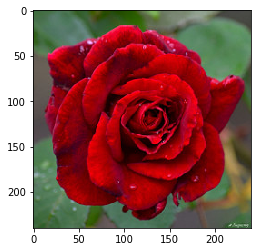

In [10]:
img = plt.imread(f'{PATH}valid/rose/{files[1]}')
plt.imshow(img);

In [11]:
img.shape

(240, 240, 3)

In [12]:
img[:4,:4]

array([[[ 68, 106,  67],
        [ 66, 107,  67],
        [ 65, 107,  67],
        [ 63, 108,  67]],

       [[ 66, 107,  65],
        [ 65, 108,  65],
        [ 65, 108,  65],
        [ 63, 108,  65]],

       [[ 65, 108,  63],
        [ 65, 108,  63],
        [ 63, 109,  63],
        [ 63, 109,  63]],

       [[ 64, 110,  63],
        [ 64, 110,  63],
        [ 64, 110,  63],
        [ 64, 110,  63]]], dtype=uint8)

torch.cuda.set_device(0)

Kaggle Dog Breed Identification. Get data from https://www.kaggle.com/c/dog-breed-identification

PATH = "data/dogbreed/"
sz = 224
arch = resnext101_64
bs = 58

label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n) # random 20% data for validation set

n

len(val_idxs)

In [ ]:
# If you haven't downloaded weights.tgz yet, download the file.
#     http://forums.fast.ai/t/error-when-trying-to-use-resnext50/7555
#     http://forums.fast.ai/t/lesson-2-in-class-discussion/7452/222
#!wget -O fastai/weights.tgz http://files.fast.ai/models/weights.tgz

#!tar xvfz fastai/weights.tgz -C fastai

## Initial exploration

!ls {PATH}

label_df = pd.read_csv(label_csv)

label_df.head()

label_df.pivot_table(index="breed", aggfunc=len).sort_values('id', ascending=False)

In [81]:
sz = 224
arch = resnext101_64
bs = 58

In [44]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH,tfms=tfms, bs=bs)

In [45]:
fn = PATH + data.trn_ds.fnames[0]; fn

'/home/predmacadmin2/fastai/data/flowers/train/daisy/34701198765_54aa641d7a_n.jpg'

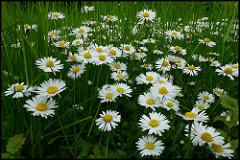

In [46]:
img = PIL.Image.open(fn); img

In [47]:
img.size

(240, 160)

In [48]:
data.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [49]:
data.val_y.shape

(517,)

In [50]:
data.trn_y.shape

(3806,)

In [51]:
data.val_y.shape[0]/data.trn_y.shape[0]

0.13583815028901733

In [52]:
type(data.val_y)

numpy.ndarray

In [53]:
unique, counts = np.unique(data.val_y, return_counts=True)
dict(zip(unique, counts))

{0: 87, 1: 121, 2: 70, 3: 137, 4: 102}

In [54]:
type(data.trn_ds.fnames)

list

In [55]:
PIL.Image.open(PATH +data.trn_ds.fnames[0]).size

(240, 160)

In [56]:
size_d = {k: PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

In [57]:
row_sz, col_sz = list(zip(*size_d.values()))

In [58]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [59]:
row_sz[:5]

array([240, 175, 500, 320, 240])

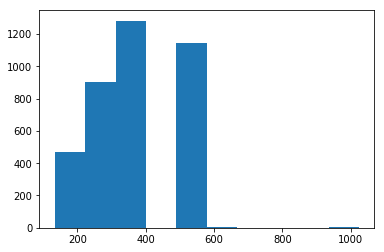

In [60]:
plt.hist(row_sz);

(array([ 376.,  108.,  885., 1280.,    1.,    1.,    1., 1146.,    0.,    6.]),
 array([134. , 184.6, 235.2, 285.8, 336.4, 387. , 437.6, 488.2, 538.8, 589.4, 640. ]),
 <a list of 10 Patch objects>)

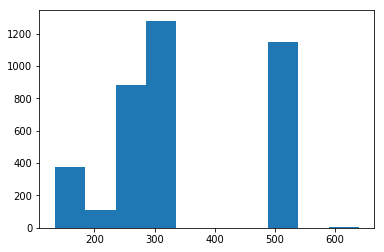

In [61]:
plt.hist(row_sz[row_sz < 1000])

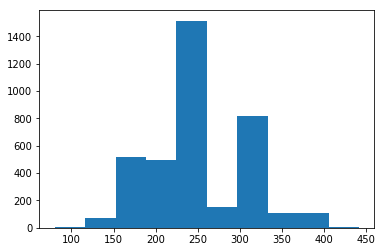

In [62]:
plt.hist(col_sz);

(array([   4.,   74.,  519.,  497., 1515.,  153.,  815.,  111.,  110.,    8.]),
 array([ 80. , 116.2, 152.4, 188.6, 224.8, 261. , 297.2, 333.4, 369.6, 405.8, 442. ]),
 <a list of 10 Patch objects>)

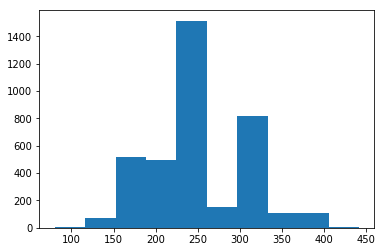

In [63]:
plt.hist(col_sz[col_sz < 1000])

In [65]:
len(data.trn_ds)

3806

In [66]:
len(data.classes), data.classes[:5]

(5, ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])

## Initial model

In [182]:
def get_data(sz, bs): # sz: image size, bs: batch size
    #tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    #data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                       #val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    #arch = resnext101_64
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_paths(PATH,tfms=tfms, bs=bs)
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
    return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time

#Source:   
#    def resize(self, targ, new_path):
#        new_ds = []
#        dls = [self.trn_dl,self.val_dl,self.fix_dl,self.aug_dl]
#        if self.test_dl: dls += [self.test_dl, self.test_aug_dl]
#        else: dls += [None,None]
#        t = tqdm_notebook(dls)
#        for dl in t: new_ds.append(self.resized(dl, targ, new_path))
#        t.close()
#        return self.__class__(new_ds[0].path, new_ds, self.bs, self.num_workers, self.classes)
#File:      ~/fastai/courses/dl1/fastai/dataset.py

### Precompute

In [183]:
data = get_data(sz, bs)

In [184]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

Learning rate finder

In [185]:
lrf=learn.lr_find()

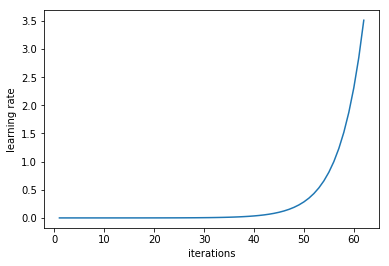

In [186]:
learn.sched.plot_lr()

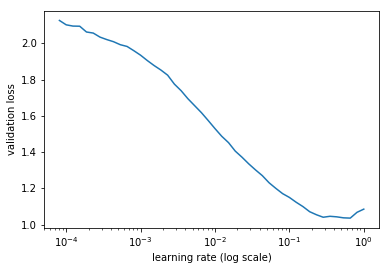

In [187]:
learn.sched.plot()

In [87]:
learn.fit(1e-2, 10)

epoch      trn_loss   val_loss   accuracy                  
    0      0.124449   0.22992    0.928433  
    1      0.108301   0.211888   0.926499                  
    2      0.098132   0.216747   0.922631                   
    3      0.089766   0.216992   0.928433                   
    4      0.078173   0.223896   0.93617                    
    5      0.069392   0.229004   0.930368                   
    6      0.071603   0.24693    0.922631                   
    7      0.065112   0.232513   0.926499                   
    8      0.061237   0.211372   0.928433                   
    9      0.049044   0.221616   0.932302                   



[array([0.22162]), 0.932301747960325]

### Augment

In [88]:
from sklearn import metrics

In [89]:
data = get_data(sz, bs)

In [103]:
??ConvnetBuilder()

ps (float or array of float): dropout parameters

In [90]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [91]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.485875   0.241097   0.903288  
    1      0.346766   0.201388   0.918762                  



[array([0.20139]), 0.9187620847091453]

In [92]:
learn.precompute = False

In [93]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.307093   0.195384   0.928433  
    1      0.277417   0.203965   0.926499                  
    2      0.277848   0.195326   0.926499                  
    3      0.269571   0.188829   0.930368                  
    4      0.247852   0.179585   0.928433                  



[array([0.17959]), 0.9284332798112984]

In [94]:
learn.save('224_pre')

In [95]:
learn.load('224_pre')

## Increase size

In [96]:
# Starting training on small images for a few epochs, then switching to bigger images, and continuing training is an amazingly effective way to avoid overfitting.

# http://forums.fast.ai/t/planet-classification-challenge/7824/96
# set_data doesn’t change the model at all. It just gives it new data to train with.
learn.set_data(get_data(299, bs)) 
learn.freeze()

#Source:   
#    def set_data(self, data, precompute=False):
#        super().set_data(data)
#        if precompute:
#            self.unfreeze()
#            self.save_fc1()
#            self.freeze()
#            self.precompute = True
#        else:
#            self.freeze()
#File:      ~/fastai/courses/dl1/fastai/conv_learner.py

In [97]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 299, 299]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 75, 75]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 75, 

In [98]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.259752   0.166515   0.934236  
    1      0.240436   0.173787   0.940039                  
    2      0.227847   0.177005   0.934236                  



[array([0.17701]), 0.9342359808242989]

Validation loss is much lower than training loss. This is a sign of underfitting. Cycle_len=1 may be too short. Let's set cycle_mult=2 to find better parameter.

In [99]:
# When you are under fitting, it means cycle_len=1 is too short (learning rate is getting reset before it had the chance to zoom in properly).
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2) # 1+2+4 = 7 epochs

epoch      trn_loss   val_loss   accuracy                  
    0      0.225114   0.192805   0.930368  
    1      0.225775   0.176631   0.932302                  
    2      0.208892   0.168461   0.940039                  
    3      0.202272   0.171729   0.938104                  
    4      0.201226   0.169957   0.934236                  
    5      0.194916   0.183262   0.932302                  
    6      0.180476   0.174956   0.938104                  



[array([0.17496]), 0.9381044548530874]

Training loss and validation loss are getting closer and smaller. We are on right track.

In [104]:
log_preds, y = learn.TTA() # (5, 2044, 120), (2044,)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.9400386847195358, 0.1637315007663402)

In [105]:
len(data.val_ds.y), data.val_ds.y[:5]

(517, array([0, 0, 0, 0, 0]))

In [106]:
learn.save('299_pre')

In [107]:
learn.load('299_pre')

In [108]:
learn.fit(1e-2, 1, cycle_len=2) # 1+1 = 2 epochs

epoch      trn_loss   val_loss   accuracy                  
    0      0.179014   0.182193   0.934236  
    1      0.173524   0.182743   0.934236                  



[array([0.18274]), 0.9342359875110869]

In [109]:
learn.save('299_pre')

In [110]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.941972920696325, 0.15963234602151616)

This dataset is so similar to ImageNet dataset. Training convolution layers doesn't help much. We are not going to unfreeze.

In [116]:
log_preds = learn.predict()
log_preds.shape

(517, 5)

In [117]:
log_preds[:8]

array([[ -0.00034,  -8.69185, -11.25012,  -8.86921, -11.0123 ],
       [ -0.00038,  -8.11506, -12.3014 ,  -9.51675, -12.93307],
       [ -0.00101,  -7.31538,  -9.47657,  -9.0468 ,  -8.80296],
       [ -0.27862,  -1.50298,  -8.18836,  -3.89642,  -9.08745],
       [ -0.00014, -13.29751, -13.83807,  -8.93273, -13.05297],
       [ -0.64663,  -3.77252,  -1.26188,  -2.08418,  -3.08637],
       [ -0.06926,  -4.74794,  -5.19086,  -3.03591,  -5.37164],
       [ -0.33983,  -9.56411,  -7.32318,  -1.24728,  -9.23523]], dtype=float32)

In [118]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # 

In [144]:
preds[0:4]

array([0, 0, 0, 0])

In [136]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [137]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [157]:
{data.val_y[2]}

{0}

In [163]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    #title_probs = [probs[x] for x in idxs]
    title_probs = [str(data.val_y[x])+' pred as '+str(preds[x]) for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


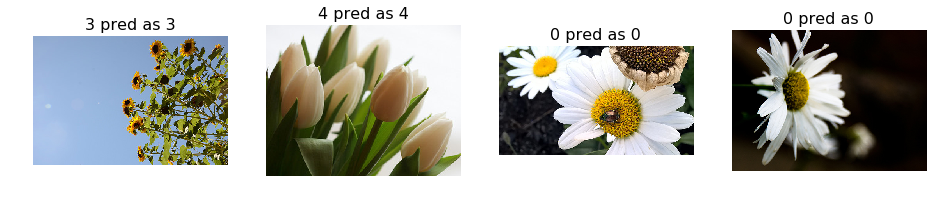

In [164]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


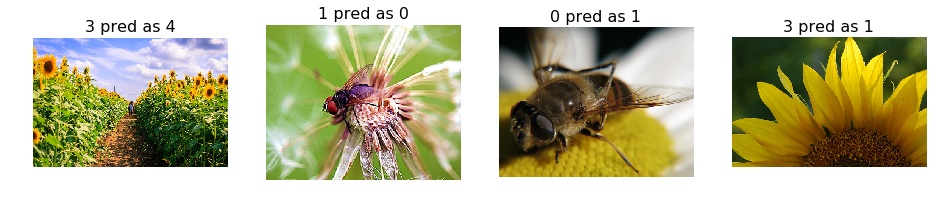

In [165]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [169]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:2]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct Predictions
Most correct Predictions
Most correct Predictions
Most correct Predictions
Most correct Predictions


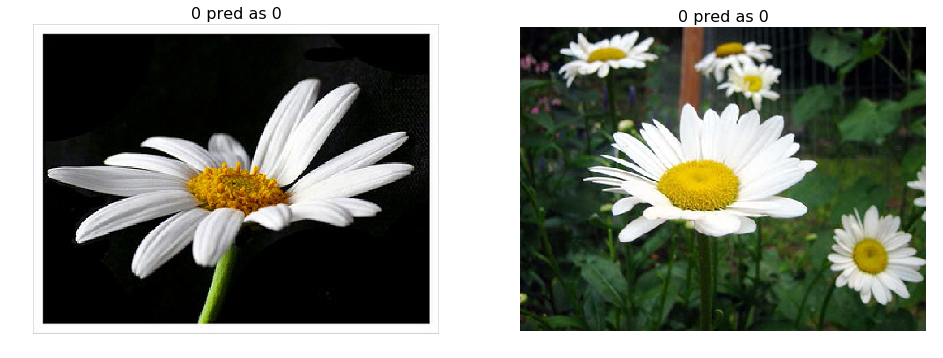

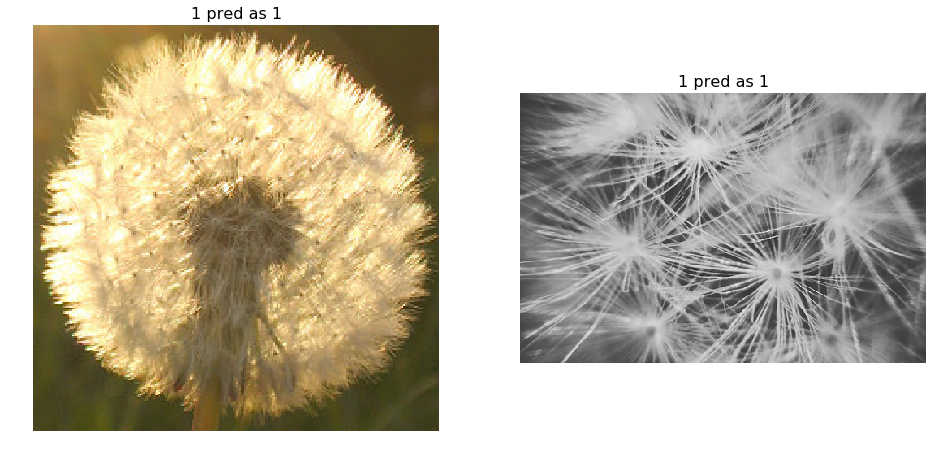

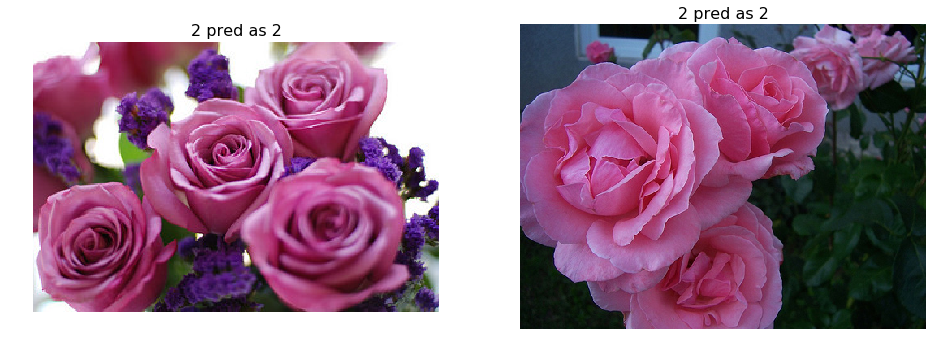

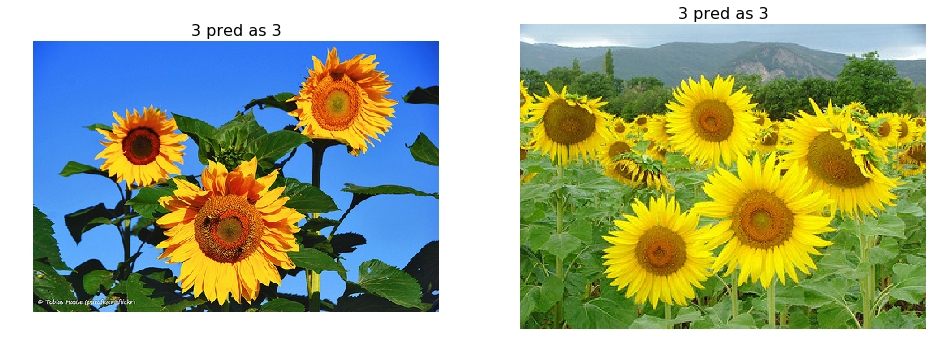

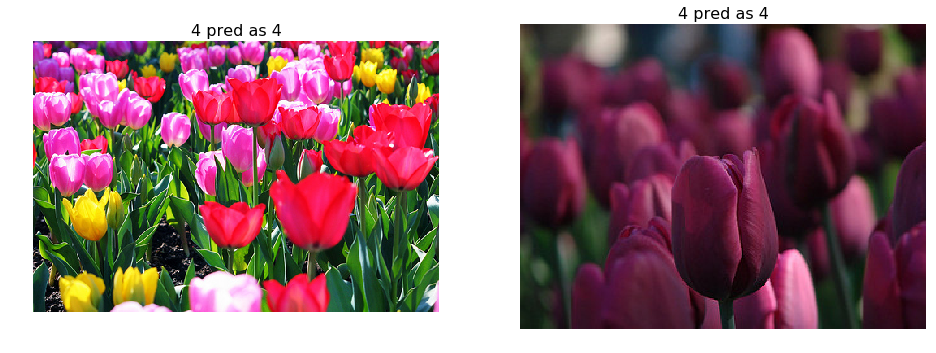

In [174]:
for i in range(0,5):
    plot_val_with_title(most_by_correct(i, True), "Most correct Predictions")

Most incorrect Predictions
Most incorrect Predictions
Most incorrect Predictions
Most incorrect Predictions
Most incorrect Predictions


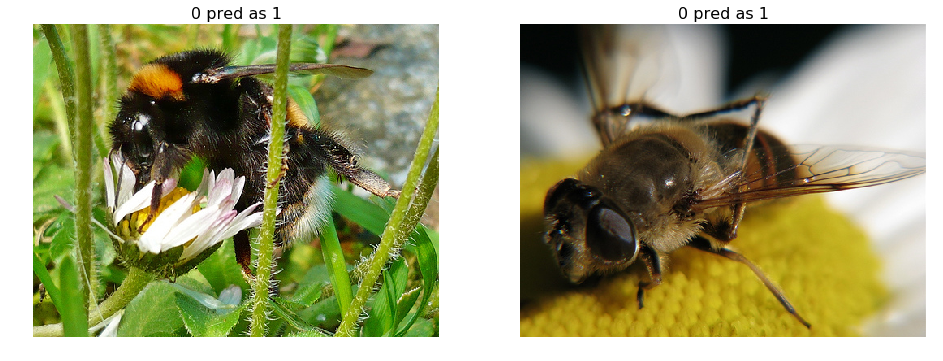

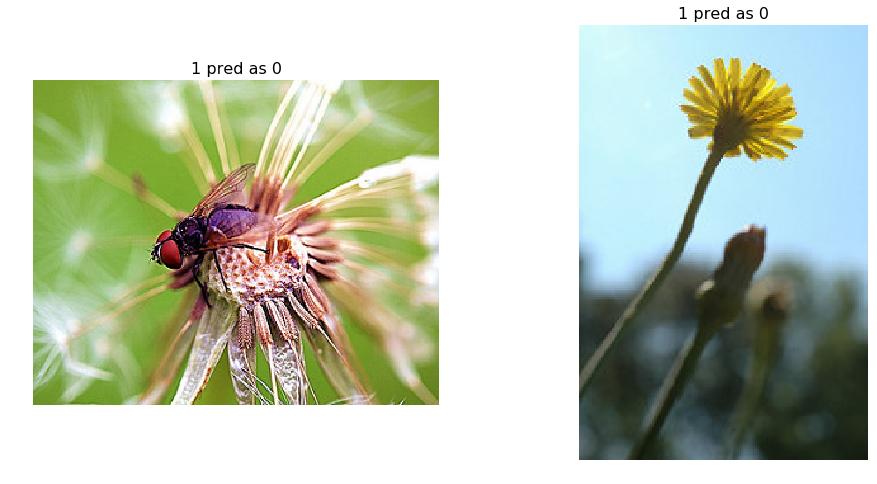

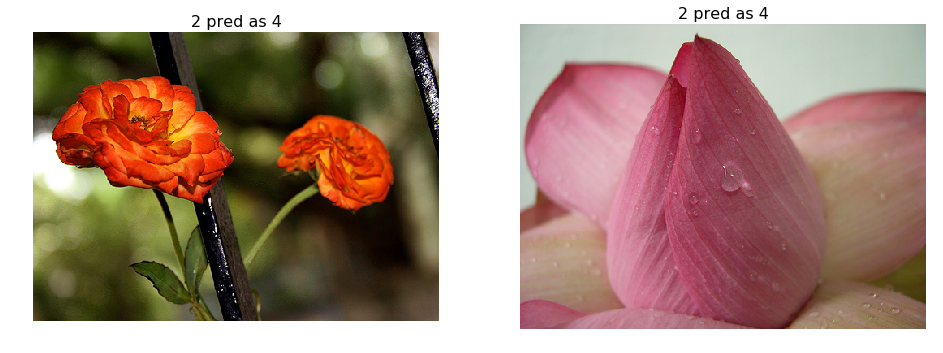

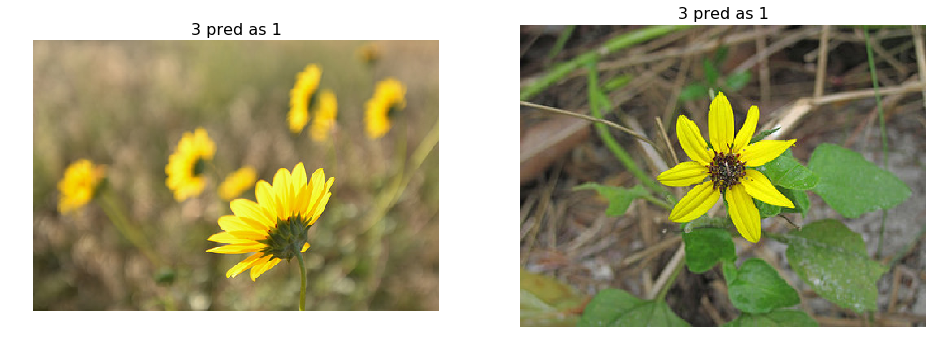

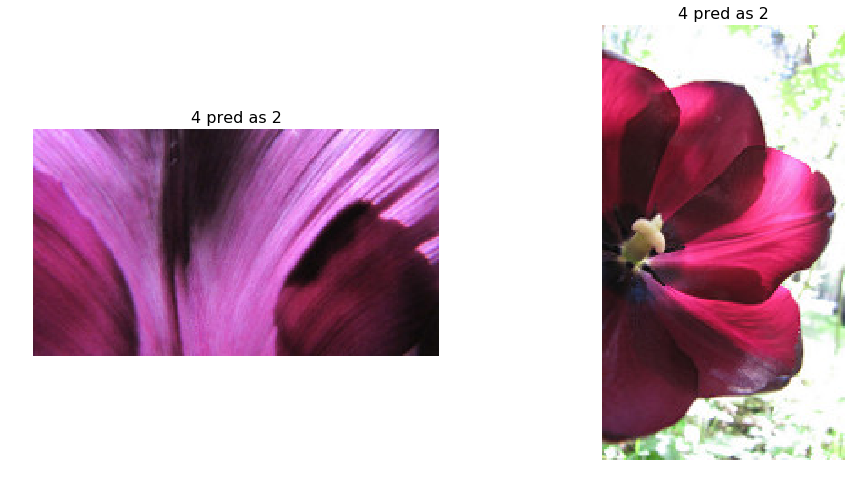

In [177]:
for i in range(0,5):
    plot_val_with_title(most_by_correct(i, False), "Most incorrect Predictions")

Most uncertain predictions


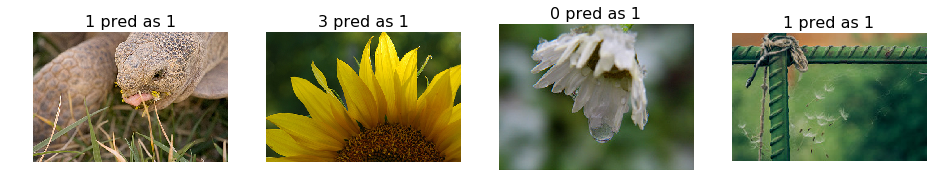

In [178]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")